### Initiate: Notebook for Dataset Inspection and Visualization

In [11]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchvision.datasets import OxfordIIITPet

print("Torch:", torch.__version__)
import torchvision
print("TorchVision:", torchvision.__version__)


Torch: 2.8.0+cu126
TorchVision: 0.23.0+cu126


In [12]:
img_tf = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [13]:
def mask_to_long(mask_pil):
    return torch.as_tensor(np.array(mask_pil), dtype=torch.long)

In [14]:
import numpy as np
mask_tf = transforms.Compose([
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.Lambda(mask_to_long),
])

In [15]:
ds = OxfordIIITPet(
    root="data/pets",
    split="trainval",
    target_types="segmentation",
    download=True,
    transform=img_tf,
    target_transform=mask_tf
)

print("Samples:", len(ds))

Samples: 3680


In [16]:
loader = DataLoader(
    ds,
    batch_size=4,
    shuffle=True,
    num_workers=2,
    pin_memory=False
)

In [17]:
imgs, masks = next(iter(loader))
print(imgs.shape, masks.shape, masks.dtype)

torch.Size([4, 3, 256, 256]) torch.Size([4, 256, 256]) torch.int64


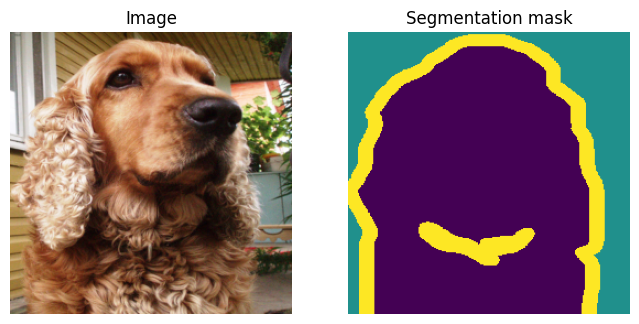

In [18]:
def show_sample(i=0):
    img = imgs[i].permute(1,2,0)
    mask = masks[i]
    fig, axs = plt.subplots(1,2, figsize=(8,4))
    axs[0].imshow(img)
    axs[0].set_title("Image")
    axs[0].axis("off")
    axs[1].imshow(mask)
    axs[1].set_title("Segmentation mask")
    axs[1].axis("off")
    plt.show()

show_sample(1)

In [19]:
import numpy as np
from collections import Counter
import torch

In [20]:
print(f"Total samples: {len(ds)}")
print(f"Image size: {ds[0][0].shape}, Mask size: {ds[0][1].shape}")


Total samples: 3680
Image size: torch.Size([3, 256, 256]), Mask size: torch.Size([256, 256])


In [21]:
counts = Counter()
for i in range(100):
    mask = ds[i][1].flatten()
    counts.update(mask.numpy().tolist())

print("Approx. class pixel distribution:", counts)

Approx. class pixel distribution: Counter({2: 4025410, 1: 1650874, 3: 877316})
